## Cature display outputs

In [ ]:
#| default_exp display

In [ ]:
#| export
from IPython.core.displaypub import DisplayPublisher
from IPython.core.display_functions import _new_id
from IPython.display import display, clear_output, Javascript
from IPython import get_ipython
from typing import List
from PIL import Image
from collections import defaultdict
import warnings
import sys

In [ ]:
from io import StringIO

class TeeIO(StringIO):
    def __init__(self, original_stdout):
        super().__init__()
        self.original_stdout = original_stdout

    def write(self, s):
        self.original_stdout.write(s)
        return super().write(s)

    def flush(self):
        self.original_stdout.flush()
        return super().flush()

In [ ]:
#| export
class PassthroughCapturer(DisplayPublisher):
    """A DisplayPublisher that stores AND displays!"""

    raw_outputs: List

    def __init__(self):
        self._publisher = None
        self.raw_outputs = []

    def publish(
        self, data, metadata=None, source=None, *, transient=None, update=False
    ):
        self.raw_outputs.append(
            {
                "data": data,
                "metadata": metadata,
                "transient": transient,
                "update": update,
            }
        )
        self._publisher.publish(data, metadata=metadata, transient=transient, update=update)

    def clear_output(self, wait=False):
        self.raw_outputs = []
        self._publisher.clear_output(wait)

    def start(self):
        ip = get_ipython()
        self._publisher = ip.display_pub
        ip.display_pub = self

        # print("starting passthrough: ", id(self._publisher), id(self))

    # Note: stop must be called from the cell that started the
    # passthrough, or from the associated post-cell callback
    def stop(self):
        ip = get_ipython()
        assert self._publisher
        ip.display_pub = self._publisher

    def get_outputs(self, with_js=False):
        coalesced_outputs = []
        display_id_map = defaultdict(list)

        outputs = self.raw_outputs
        if not with_js:
            outputs = [o for o in outputs if 'application/javascript' not in o['data']]

        # dicts are ordered in Python 3.7+
        for output in outputs:
            display_id = output['transient']['display_id'] if output['transient'] else _new_id()
            if not output['update']:
                display_id_map[display_id] += [output["data"]]
            else:
                display_id_map[display_id][-1] = output["data"]

        for display_id, output_list in display_id_map.items():
            coalesced_outputs += output_list

        return coalesced_outputs

starting passthrough:  130628418075392 130628418522528


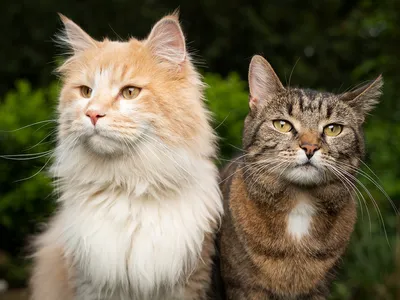

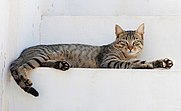

Hello print!


<IPython.core.display.Javascript object>

'Hello, world 3!'

Hello!


In [ ]:
capturer = PassthroughCapturer()
capturer.start()
image = Image.open("cat.jpg")
image2 = Image.open("cat2.png")
ttt = display(image2, display_id=True)
ttt.display(image2)
print("Hello print!")
display(Javascript("alert('Hello, world!!')"))
ttt.update(image)
display("Hello, world 3!")
# # clear_output()

# print("Hello, world!")
# display("Hello, world!")
# display("Hello, world 2!")

# ttt = display("Hello, world 3!", display_id=True)
# ttt.update("Hello, world 4!")

# ttt = display("Hello, world 5!", display_id=True)
# ttt.display("Hello, world 6!")

print("Hello!")
capturer.stop()

In [ ]:
# capturer.stop()

In [ ]:
capturer.get_outputs()

[{'text/plain': '<PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x300>',
  'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01,\x08\x02\x00\x00\x00b\xd5r\x95\x00\x01\x00\x00IDATx\x01\xec\xfd\xf9\x8feY\x92\xdf\x89\xf9\xdb\xf7\xe7\xef\xf9\xee\x1e\x1e\x1e\xfb\x96\x19\x99Y\xb9T\xd6\xd2\xb5uuU\xb1\x9b\x9cnn\x9a!f\x86\x83\x11)@\xbf\x0b\xfaM\xff\x80\x04I\xbf\x0cF\x10@\x0c\xa0\x014\x90\x88\x19\n\xd4\x90\xd3-R\xcd\xe6tW/\xea\xa5\xaa2+\xb3r\xcfX=<|w\x7f\xfe\xf6\xfd=}\xbev\xee\xbd\xef\xfa\x16\x11\x99UlP\x03\xdd\x8c\xbc~\xdf\xbdg\xb5cf\xc7\xcc\x8e\x1d;\x91\xfc\xcc\xd4\xe4\x1aGy\x8eF"\xc1\x9b\x88\xf7\xac\xf7\xe3\xf1\xd8\xde\x8f\x82\xaf\xee\xc1\xa5\x89\'\x12\'\xde\x9f\xfb3\xa2\x12\x12\xf1\xb8\x12\xd8\xb3K9\x1e\xb9\xf2\xbd\xba\\u#\xab\xd4}\xf2\x1b@r\xa5q\xd7\xc8o\xecx4\x8a\x8e\xa3\xa14~\x8a\xa9\xa9~\xb77\xf9\x11z\x8aF\xe9\xeb\xb1\xcb\xfb\x18n\x95\xd7\xebI6\xd7J\xafy~\xed\xc1\xe7l*\xcds$\xea>\xa8\xa7\xd1h,\xf8\xea\xde\xd3\x9d\xb1\xfd\xcf\x9f\xc8\xd8\x03l\xb8\xe5\xee\

In [ ]:
ip = get_ipython()
ip.hoo

ipykernel.displayhook.ZMQShellDisplayHook

In [ ]:
from IPython.utils.capture import capture_output

with capture_output() as c:
    print("This will be captured")

print(f"Captured stdout: {c.stdout}")
print(f"Captured stderr: {c.stderr}")

Captured stdout: This will be captured

Captured stderr: 


In [ ]:
display("Hello, world 7!")

'Hello, world 7!'